In [4]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Tweets.csv')

In [6]:
df = df[["airline_sentiment","text","airline"]]

In [72]:
df

,airline_sentiment,text,airline,subjectivity,polarity,predictions,final_text
0,1,What said.,Virgin America,0.000000,0.000000,neutral,What said.
1,2,plus you've added commercials to the experien...,Virgin America,0.000000,0.000000,neutral,plus added commercials experience... tacky.
2,1,I didn't today... Must mean I need to take an...,Virgin America,0.687500,-0.390625,negative,I today... Must mean I need take another trip!
3,0,"it's really aggressive to blast obnoxious ""en...",Virgin America,0.350000,0.006250,positive,"really aggressive blast obnoxious ""entertainme..."
4,0,and it's a really big bad thing about it,Virgin America,0.383333,-0.350000,negative,really big bad thing
...,...,...,...,...,...,...,...
14635,2,thank you we got on a different flight to Chi...,American,0.600000,0.000000,neutral,thank got different flight Chicago.
14636,0,leaving over 20 minutes Late Flight. No warni...,American,0.600000,-0.300000,negative,leaving 20 minutes Late Flight. No warnings co...
14637,1,Please bring American Airlines to BlackBerry10,American,0.000000,0.000000,neutral,Please bring American Airlines BlackBerry10
14638,0,"you have my money, you change my flight, and ...",American,0.375000,-0.125000,negative,"money, change flight, answer phones! Any sugge..."


In [7]:
positive=df[df['airline_sentiment']=='positive'].text
neutral=df[df['airline_sentiment']=='neutral'].text
negative=df[df['airline_sentiment']=='negative'].text

# Positive Word Cloud

NameError: name 'ax' is not defined

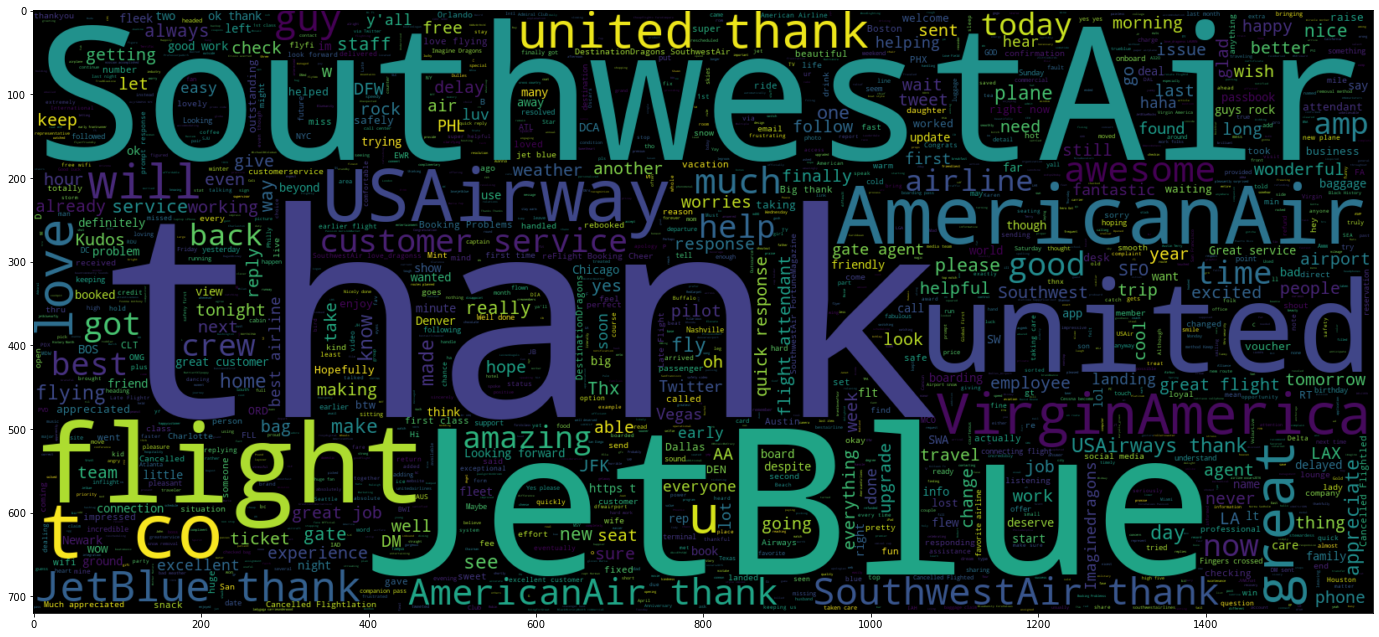

In [8]:
plt.figure(figsize=(24,20))
world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(positive))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

# Neutral Word Cloud

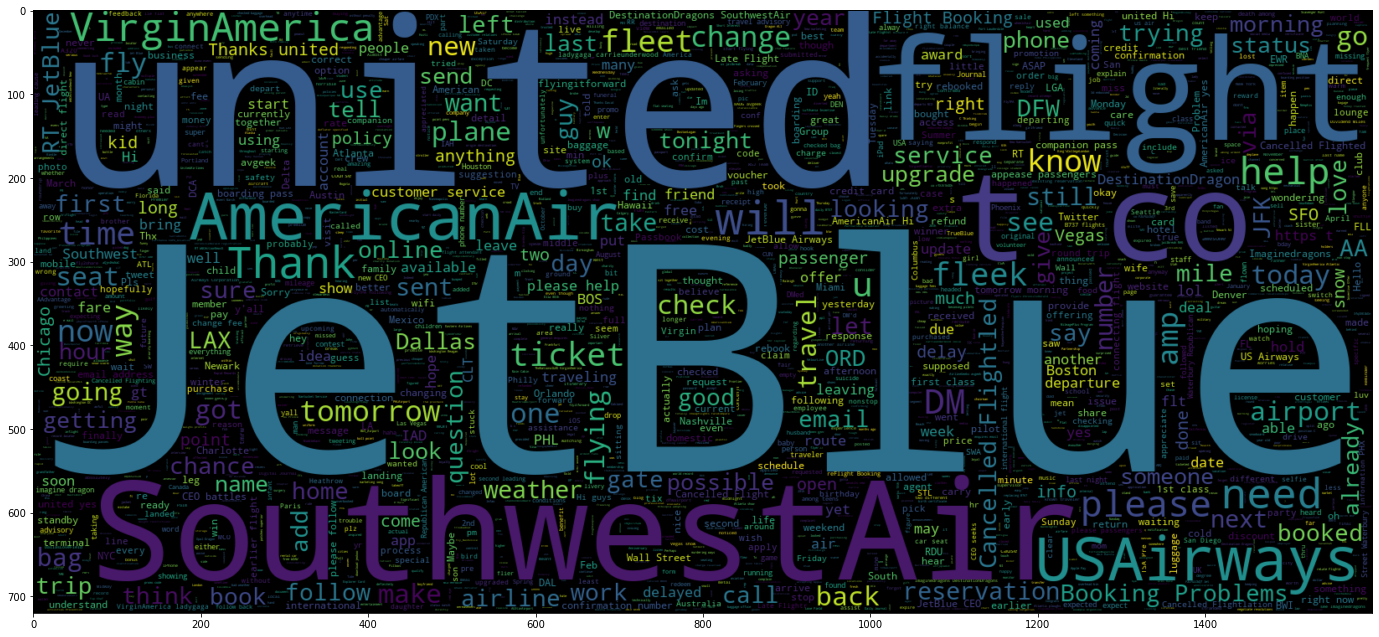

In [21]:
plt.figure(figsize=(24,12))
world_cloud_neutral=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate(" ".join(neutral))
plt.imshow(world_cloud_neutral,interpolation='bilinear')

# Negative Feedback Wordcloud

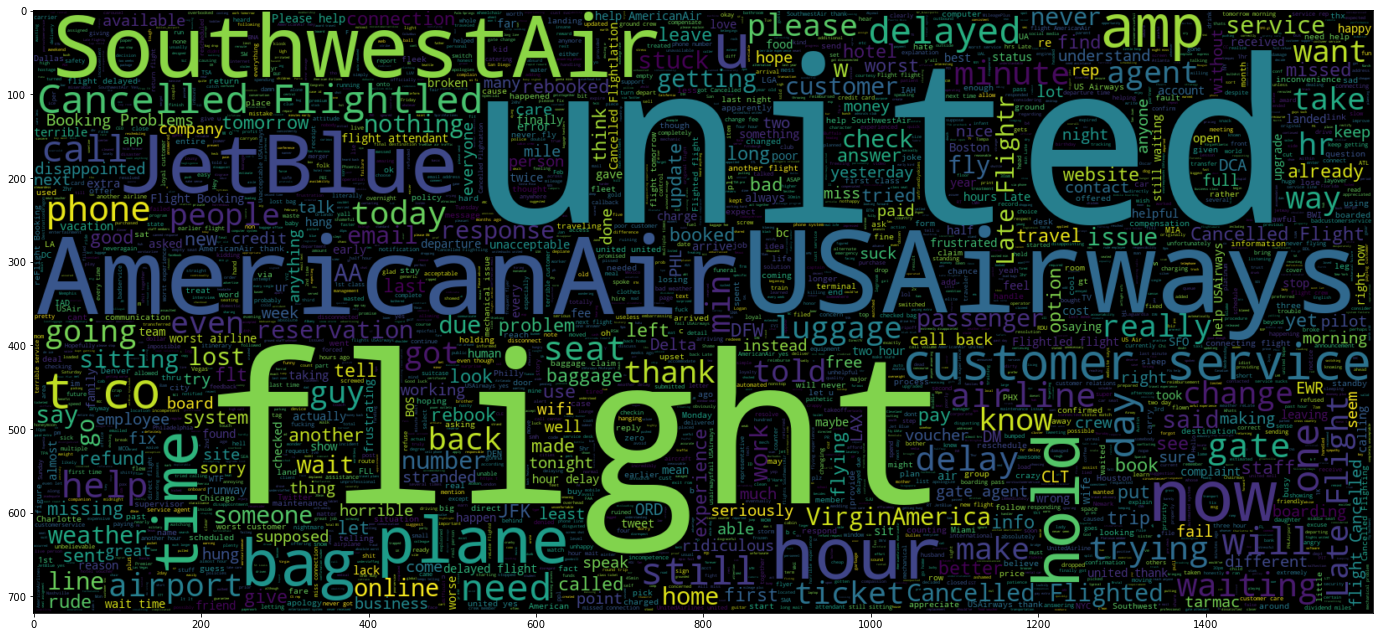

In [10]:
plt.figure(figsize = (24,12)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3200 , width = 1600 , height = 720).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')

In [9]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text) #Removed @ mentions
    text = re.sub(r'#','',text) # remove ##
    text = re.sub(r'RT[\s]+','',text)  # Remove rts
    text = re.sub(r'https?:\/\/S+','',text) # Removing Lİnks
    return text

In [11]:
df['text'] = df['text'].apply(cleanTxt)

In [12]:
df['text'].head()

0                                          What  said.
1     plus you've added commercials to the experien...
2     I didn't today... Must mean I need to take an...
3     it's really aggressive to blast obnoxious "en...
4             and it's a really big bad thing about it
Name: text, dtype: object

In [13]:
#Creating a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Creating a function to get polarity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity




In [14]:
df['subjectivity'] = df['text'].apply(getSubjectivity)
df['polarity'] = df['text'].apply(getPolarity)

In [15]:
df

,airline_sentiment,text,airline,subjectivity,polarity
0,neutral,What said.,Virgin America,0.000000,0.000000
1,positive,plus you've added commercials to the experien...,Virgin America,0.000000,0.000000
2,neutral,I didn't today... Must mean I need to take an...,Virgin America,0.687500,-0.390625
3,negative,"it's really aggressive to blast obnoxious ""en...",Virgin America,0.350000,0.006250
4,negative,and it's a really big bad thing about it,Virgin America,0.383333,-0.350000
...,...,...,...,...,...
14635,positive,thank you we got on a different flight to Chi...,American,0.600000,0.000000
14636,negative,leaving over 20 minutes Late Flight. No warni...,American,0.600000,-0.300000
14637,neutral,Please bring American Airlines to BlackBerry10,American,0.000000,0.000000
14638,negative,"you have my money, you change my flight, and ...",American,0.375000,-0.125000


In [16]:
#Create a function to compute the negativei neutral and positive
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [17]:
df["predictions"] = df["polarity"].apply(getAnalysis)

In [18]:
df.head(20)

,airline_sentiment,text,airline,subjectivity,polarity,predictions
0,neutral,What said.,Virgin America,0.000000,0.000000,neutral
1,positive,plus you've added commercials to the experien...,Virgin America,0.000000,0.000000,neutral
2,neutral,I didn't today... Must mean I need to take an...,Virgin America,0.687500,-0.390625,negative
3,negative,"it's really aggressive to blast obnoxious ""en...",Virgin America,0.350000,0.006250,positive
4,negative,and it's a really big bad thing about it,Virgin America,0.383333,-0.350000,negative
5,negative,seriously would pay $30 a flight for seats th...,Virgin America,0.633333,-0.208333,negative
6,positive,"yes, nearly every time I fly VX this “ear wor...",Virgin America,0.766667,0.466667,positive
7,neutral,Really missed a prime opportunity for Men Wit...,Virgin America,0.200000,0.200000,positive
8,positive,"Well, I didn't…but NOW I DO! :-D",Virgin America,1.000000,1.000000,positive
9,positive,"it was amazing, and arrived an hour early. Yo...",Virgin America,0.600000,0.466667,positive


In [19]:
comparison_column = np.where(df["airline_sentiment"] == df["predictions"], True, False)


In [20]:
from collections import Counter

In [21]:
Counter(comparison_column)

Counter({True: 6798, False: 7842})

In [22]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [23]:
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))


In [24]:
df.airline_sentiment


0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [25]:
from nltk.corpus import stopwords # an an the çok kullanılan kelimeler


In [26]:
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute


In [29]:
df['final_text'] = df['text'].apply(lambda x : remove_username(x))
df['final_text'] = df['text'].apply(lambda x : remove_url(x))
df['final_text'] = df['text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['text'].apply(lambda x : decontraction(x))
df['final_text'] = df['text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['text'].apply(lambda x : char(x))
df['final_text'] = df['text'].apply(lambda x : x.lower())
df['final_text'] = df['text'].apply(lambda x : remove_stopwords(x))

In [30]:
df.head(20)

,airline_sentiment,text,airline,subjectivity,polarity,predictions,final_text
0,1,What said.,Virgin America,0.000000,0.000000,neutral,What said.
1,2,plus you've added commercials to the experien...,Virgin America,0.000000,0.000000,neutral,plus added commercials experience... tacky.
2,1,I didn't today... Must mean I need to take an...,Virgin America,0.687500,-0.390625,negative,I today... Must mean I need take another trip!
3,0,"it's really aggressive to blast obnoxious ""en...",Virgin America,0.350000,0.006250,positive,"really aggressive blast obnoxious ""entertainme..."
4,0,and it's a really big bad thing about it,Virgin America,0.383333,-0.350000,negative,really big bad thing
5,0,seriously would pay $30 a flight for seats th...,Virgin America,0.633333,-0.208333,negative,seriously would pay $30 flight seats playing. ...
6,2,"yes, nearly every time I fly VX this “ear wor...",Virgin America,0.766667,0.466667,positive,"yes, nearly every time I fly VX “ear worm” won..."
7,1,Really missed a prime opportunity for Men Wit...,Virgin America,0.200000,0.200000,positive,Really missed prime opportunity Men Without Ha...
8,2,"Well, I didn't…but NOW I DO! :-D",Virgin America,1.000000,1.000000,positive,"Well, I didn't…but NOW I DO! :-D"
9,2,"it was amazing, and arrived an hour early. Yo...",Virgin America,0.600000,0.466667,positive,"amazing, arrived hour early. You're good me."


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [42]:
from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [43]:
X = df['final_text']
y = df['airline_sentiment']

In [44]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [45]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [46]:
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)

In [47]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)


In [49]:
accuracy_score(random_forest_classifier_prediction,y_test)


0.8878558977338756

In [50]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:58:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [51]:
xgb_prediction =  xgb.predict(X_test)


In [52]:
accuracy_score(xgb_prediction,y_test)


0.8349796629866357

In [53]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [57]:
gbc_prediction =  gbc.predict(X_test)


In [58]:
gbc_prediction

array([1, 0, 2, ..., 1, 0, 2], dtype=int64)

In [59]:
accuracy_score(gbc_prediction,y_test)


0.7635095874491574

In [60]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [61]:
svm_prediction =  svm.predict(X_test)


In [62]:
accuracy_score(svm_prediction,y_test)


0.9026728646135967

In [63]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [64]:
nb_prediction =  nb.predict(X_test)


In [65]:
accuracy_score(nb_prediction,y_test)


0.8361417780360255

In [66]:
des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
des_tree_classifier_prediction=des_tree_classifier.predict(X_test)


In [68]:
accuracy_score(des_tree_classifier_prediction,y_test)


0.8054909936083672

In [69]:
cr = classification_report(y_test, random_forest_classifier_prediction)


In [70]:
import seaborn as sns

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      2343
           1       0.84      0.89      0.87      2264
           2       0.94      0.94      0.94      2277

    accuracy                           0.89      6884
   macro avg       0.89      0.89      0.89      6884
weighted avg       0.89      0.89      0.89      6884



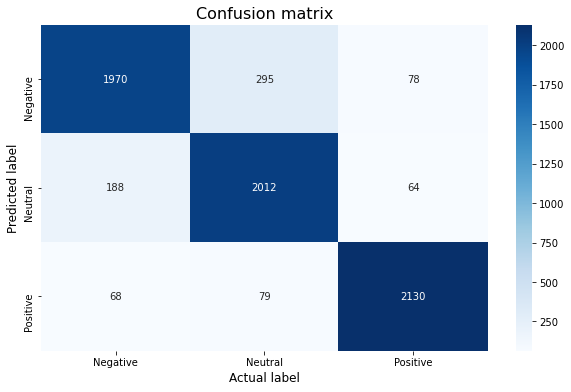

In [71]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,random_forest_classifier_prediction)


# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()